# Instalación versión adeacuada de TensorFlow

In [ ]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.17.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorflow-2.17.0


In [ ]:
!pip install tensorflow==2.14.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: google-auth-oauthlib
    Found existing ins

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.14.0


#Imports necesarios

In [ ]:
pip install split_folders

In [ ]:
from psutil import virtual_memory
from google.colab import drive
from pathlib import Path
import os #lectura o escritura en el sistema de archivos.
import matplotlib.pyplot as plt #proporciona una interfaz similar a MATLAB para la creación de gráficos y figuras.
import numpy as np #fundamental para la computación científica en Python, proporcionando soporte para matrices y operaciones matemáticas de alto rendimiento.
import tensorflow as tf #TensorFlow es una biblioteca de código abierto para el aprendizaje automático,
from tensorflow import keras #Keras es una API de alto nivel para construir y entrenar modelos de aprendizaje profundo.
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import datetime
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
import cv2
import json
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing import image

from keras.models import Model




#  Montaje del drive y organización de directorios



In [ ]:
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


Añadimos la ruta en la que vamos a tener los datasheets y la sacamos por pantalla para ver si es correcta.

# Configurar nuestro propio modelo y usar el modelo preentrenado ResNet50

In [ ]:
# Cargar el modelo base ResNet50 preentrenado en ImageNet sin la parte superior
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

# Descongelar todas las capas del modelo base
base_model.trainable = True

# Crear un nuevo modelo
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(34, activation='softmax')  # 34 clases
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy']) #lr está obsoleto, hay que usar learning_rate




94765736/94765736 [==============================] - 1s 0us/step


# Obtener clases para entrenamiento

Obtener una lista de clases a partir de un conjunto de datos organizado en subdirectorios, donde cada subdirectorio representa una clase. Esta lista puede luego ser utilizada en la configuración de generadores de datos para entrenamiento y validación

In [ ]:
#SI DESEAS AÑADIR ALGUNA CLASE NUEVA CON SUS RESPECTIVAS FOTOS, TAN SOLO AÑADELAS AL DRIVE DE ESTA CELDA.
rutaClases=Path('gdrive/My Drive/plantasIvan/newplantvillage')

print(rutaClases)

#Enlace disponible con las clases usadas
#https://drive.google.com/drive/folders/1hOImmBNjVnLyFUuxx65dqeo6ygJYnTjJ?usp=sharing


In [ ]:

# Filtrar y ordenar los subdirectorios
classes_train = sorted(list(filter(lambda x: os.path.isdir('/content/gdrive/MyDrive/plantasIvan/newplantvillage/' + x), os.listdir('/content/gdrive/MyDrive/plantasIvan/newplantvillage/'))))


Imprimimos la lista de clases

In [ ]:
print(classes_train) #to show names of all classes

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


La biblioteca split_folders se utiliza para dividir automáticamente carpetas que contienen conjuntos de datos en subconjuntos de entrenamiento, validación y prueba

# split_folders

Este código toma las imágenes de una carpeta de entrada, las divide en un 80% para entrenamiento y un 20% para validación, y guarda estos conjuntos en una carpeta de salida llamada "output", asegurando que la división sea reproducible mediante el uso de una semilla específica.







In [ ]:

input_folder=root_path
splitfolders.ratio(input_folder, output="output", seed=1337, ratio=(.8,.2)) #default values"

Copying files: 62979 files [09:57, 105.43 files/s]


# Aumento de datos (Data Augmentation) y generadores

Este código configura dos generadores de datos para un modelo de aprendizaje profundo utilizando TensorFlow Keras. El generador de entrenamiento procesa imágenes de la carpeta de entrenamiento y el generador de validación procesa imágenes de la carpeta de validación, ambas con imágenes redimensionadas a 200x200 píxeles y normalizadas.

In [ ]:
batch_size = 128  # Ejemplo de ajuste


# Aumento de datos para el conjunto de entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],  # Rango de brillo
    channel_shift_range=50.0,  # Desplazamiento de canal
    fill_mode='nearest'
)

# Generador de datos de entrenamiento
train_generator = train_datagen.flow_from_directory(
    '/content/output/train',
    target_size=(200, 200),
    batch_size=batch_size,
    class_mode='categorical'
)

# Aumento de datos para el conjunto de validación (opcional, moderado)
val_datagen = ImageDataGenerator(
    rescale=1/255,
    brightness_range=[0.9, 1.1]  # Variación ligera en el brillo
)

val_generator = val_datagen.flow_from_directory(
    '/content/output/val',
    target_size=(200, 200),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 50368 images belonging to 34 classes.
Found 12611 images belonging to 34 classes.


# Entrenamiento

In [ ]:
import datetime
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Directorio de logs para TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Callback para guardar el mejor modelo con más frecuencia utilizando save_freq
checkpoint = ModelCheckpoint(
    "model_mejoras.h5",
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch'  # Guardar el modelo al final de cada época
)

# Callback para detener el entrenamiento temprano si no hay mejora con mayor paciencia
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,  # Incrementar la paciencia
    verbose=1,
    restore_best_weights=True
)

# Callback para reducir la tasa de aprendizaje si no hay mejora
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    verbose=1,
    min_lr=1e-6
)

# Lista de callbacks
callbacks = [checkpoint, early_stopping, tensorboard_callback, reduce_lr]

# Número de épocas incrementado
epochs = 12
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = val_generator.n // val_generator.batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)


Epoch 1/12
393/393 [==============================] - ETA: 0s - loss: 3.0442 - accuracy: 0.4933
Epoch 1: val_loss improved from inf to 4.82701, saving model to model_mejoras.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


393/393 [==============================] - 2788s 7s/step - loss: 3.0442 - accuracy: 0.4933 - val_loss: 4.8270 - val_accuracy: 0.0312 - lr: 0.0100
Epoch 2/12
393/393 [==============================] - ETA: 0s - loss: 1.4709 - accuracy: 0.9043
Epoch 2: val_loss did not improve from 4.82701
393/393 [==============================] - 2753s 7s/step - loss: 1.4709 - accuracy: 0.9043 - val_loss: 7.4095 - val_accuracy: 0.0776 - lr: 0.0100
Epoch 3/12
393/393 [==============================] - ETA: 0s - loss: 1.1312 - accuracy: 0.9527
Epoch 3: val_loss improved from 4.82701 to 2.17276, saving model to model_mejoras.h5
393/393 [==============================] - 2758s 7s/step - loss: 1.1312 - accuracy: 0.9527 - val_loss: 2.1728 - val_accuracy: 0.7949 - lr: 0.0100
Epoch 4/12
393/393 [==============================] - ETA: 0s - loss: 0.9541 - accuracy: 0.9672
Epoch 4: val_loss improved from 2.17276 to 1.26197, saving model to model_mejoras.h5
393/393 [==============================] - 2761s 7s/step 

# Descargar modelo para no tener que volver a entrenarlo cada vez que lo queramos usar (En ese caso ir al notebook de Cargar Modelo)

In [ ]:
from google.colab import files

# Descargar el archivo .h5 a tu ordenador
files.download('/content/modelo.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Probar clasificación de imagenes

In [ ]:
# Prueba del modelo con imágenes propias
# Listar todas las imágenes en el directorio de pruebas
test_images = [f for f in os.listdir('/content/test_imgs/') if f.endswith('.jpg') or f.endswith('.png') or f.endswith('.JPG')  or f.endswith('.jpeg')]
dataset = np.ndarray(shape=(len(test_images), 200, 200, 3))

# Cargar y redimensionar las imágenes
for i, file_name in enumerate(test_images):
    try:
        img_path = os.path.join('/content/test_imgs/', file_name)
        img = cv2.imread(img_path)
        if img is not None:
            img_resize = cv2.resize(img, (200, 200))
            dataset[i] = np.array(img_resize) / 255.0
        else:
            print(f"Error al cargar la imagen: {file_name}")
    except Exception as e:
        print(f"Error procesando la imagen {file_name}: {e}")

# Verificar las dimensiones del dataset
print("Shape del dataset:", dataset.shape)
print(f"Dimensiones de la imagen: {img_resize.shape}")

Shape del dataset: (1, 200, 200, 3)
Dimensiones de la imagen: (200, 200, 3)


In [ ]:


# Realizar predicciones utilizando el modelo
predictions = model.predict(dataset)
results = np.argmax(predictions, axis=-1)

# Verificar y mostrar la imagen temporal usando matplotlib (opcional)
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB))
plt.title("Imagen temporal cargada")
plt.show()

# Construcción del diccionario de resultados
final_json = {}
for file_name, result in zip(test_images, results):
    final_json[file_name] = classes_train[result]

# Imprimir los resultados
print(final_json)


In [ ]:
# Funciones para Grad-CAM
def get_img_array(img_path, size):
    img = image.load_img(img_path, target_size=size)
    array = image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Acceder a la capa específica dentro del submodelo
    base_model = model.layers[0]
    # Obtener la capa específica dentro del submodelo
    # Assuming 'model' is already the base model and not a nested model
    last_conv_layer = model.get_layer(last_conv_layer_name)
    grad_model = tf.keras.models.Model(
        [model.input],
        [last_conv_layer.output, model.output]
    )



    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    img = cv2.imread(img_path)
    heatmap = np.uint8(255 * heatmap)
    jet = plt.colormaps.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)
    superimposed_img.save(cam_path)


# Verificación de los datos

In [ ]:
# Generar el informe de clasificación
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

# Visualizar la matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Obtener las etiquetas verdaderas y las predicciones
val_generator.reset()  # Asegurarse de que el generador está en el estado inicial
predictions = model.predict(val_generator, steps=val_generator.n // val_generator.batch_size + 1)
y_pred = np.argmax(predictions, axis=1)

# Obtener las etiquetas verdaderas
y_true = val_generator.classes

# Obtener los nombres de las clases
class_labels = list(val_generator.class_indices.keys())


99/99 [==============================] - 194s 2s/step


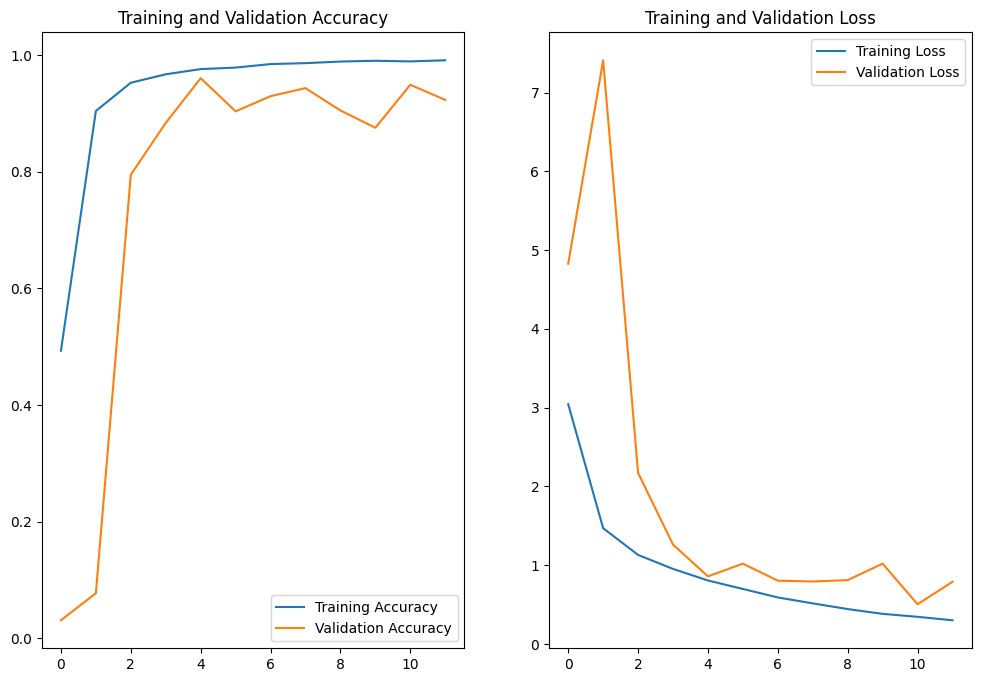

In [ ]:
# Visualización de la historia del entrenamiento
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 8))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

plot_training_history(history)
